# Figure 3A

In [1]:
import sys
sys.path.append('/Rnd/projects/spatial/vizgen/in_house_pilot/')

import glob
import s3fs
import os
import pandas as pd
import tifffile
from matplotlib import pyplot as plt
import numpy as np
import scanpy as sc
import h5py
import squidpy as sq
import helper
import json
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
print(f"squidpy=={sq.__version__}")
print(f"scanpy=={sc.__version__}")


squidpy==1.2.2
scanpy==1.9.1


In [5]:
_ad=sc.read_h5ad('CRC-TLS_26-04-22_18-00_polygon_amit_annotation_new.h5ad')

In [6]:
plt.rcParams['figure.figsize'] = [10, 10]


In [12]:
colors_rgb={'BCell': 'Blue',
 'CD4TReg': 'Teal',
 'Endothel': 'Black',
 'Epithel': 'Orange',
 'ICaf': 'Pink',
 'MyCaf': 'Purple',
 'Myeloid': 'Yellow',
 'PlasmaCell': 'Green',
 'T-cells': 'Red',
 'Unknown': 'Gray'}

/homefolder/royg/miniconda3/envs/newscanpy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


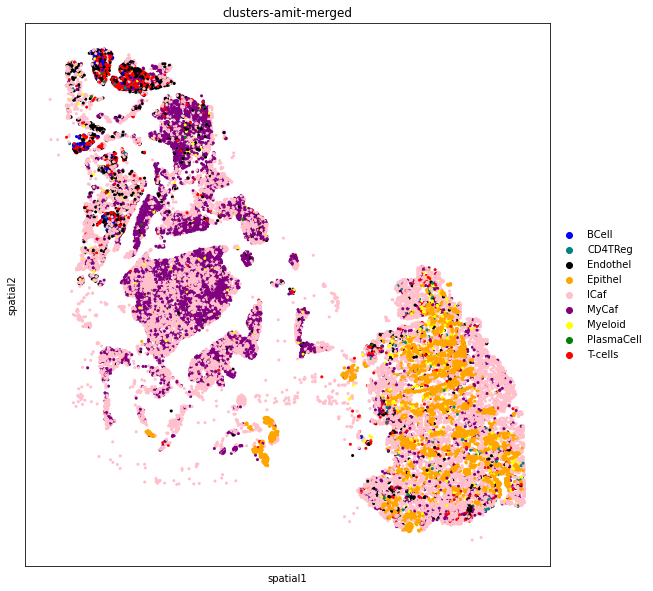

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

sc.pl.spatial(_ad[_ad.obs['clusters-amit-merged']!='Unknown'], color="clusters-amit-merged",
              spot_size=30,show=False, ax=ax, palette=colors_rgb)
plt.savefig('./TLS_spatial.pdf')

plt.show()

/homefolder/royg/miniconda3/envs/newscanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


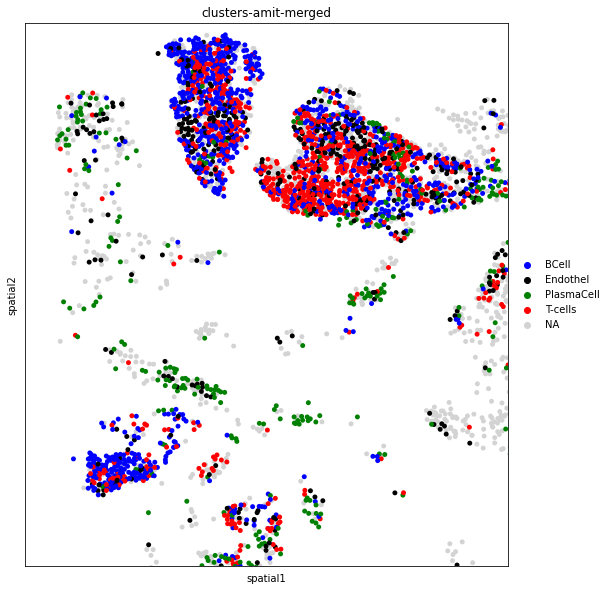

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sc.pl.spatial(ad, color='clusters-amit-merged', spot_size=11,show=False, crop_coord=[6624,7700,90,1300],
              groups=['Endothel','T-cells','BCell','PlasmaCell']
              ,palette=colors_rgb, ax=ax)

plt.savefig('TLS_pop.pdf')
plt.show()